En esta versión sí normalizaremos los datos.

In [1]:
import numpy as np
datos = np.load('datasets/pisos_vendidos.npy')
datos

array([[    68,  83420],
       [    87,  98000],
       [    93,  95000],
       [    82,  75000],
       [   103, 118900],
       [   143, 152000],
       [    59,  54000],
       [    50,  45000],
       [    78,  71000],
       [    67,  63000],
       [    92, 120000],
       [    55,  49000],
       [   121, 139000]])

In [2]:
#Vamos a dividir la primera columna (X = metros) de la segunda (y = precios)
X = datos.T[0].reshape(-1, 1)
y = datos.T[1]
print(X)
print(y)

[[ 68]
 [ 87]
 [ 93]
 [ 82]
 [103]
 [143]
 [ 59]
 [ 50]
 [ 78]
 [ 67]
 [ 92]
 [ 55]
 [121]]
[ 83420  98000  95000  75000 118900 152000  54000  45000  71000  63000
 120000  49000 139000]


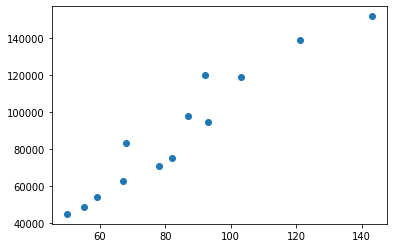

In [3]:
#Dibujamos los datos
import matplotlib.pyplot as plt 
plt.scatter(X, y)
plt.show()

In [4]:
#Vamos a normalizar los datos
X_min = np.min(X)
X_max = np.max(X)
X = (X-X_min) / (X_max - X_min)

y_min = np.min(y)
y_max = np.max(y)
y = (y-y_min) / (y_max - y_min)

In [5]:
#Contruimos la red, que será muy simple: una única neurona
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1, activation=None, input_shape=(1,)))


model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
    )

history = model.fit(
    X, y,
    epochs=500,
    batch_size=4)

2022-04-22 09:58:26.418924: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-22 09:58:26.418941: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-22 09:58:27.299662: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-22 09:58:27.299679: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-22 09:58:27.299691: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hp): /proc/driver/nvidia/version does not exist
2022-04-22 09:58:27.299851: I tensorflow/core/platform/cpu_feature_guard.c

Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0385 - mse: 0.0385
Epoch 2/500
4/4 [==============================] - 0s 724us/step - loss: 0.0367 - mse: 0.0367
Epoch 3/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0351 - mse: 0.0351
Epoch 4/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0336 - mse: 0.0336
Epoch 5/500
4/4 [==============================] - 0s 809us/step - loss: 0.0322 - mse: 0.0322
Epoch 6/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0311 - mse: 0.0311
Epoch 7/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0297 - mse: 0.0297
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0286 - mse: 0.0286
Epoch 9/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0274 - mse: 0.0274
Epoch 10/500
4/4 [==============================] - 0s 980us/step - loss: 0.0264 - mse: 0.0264  
Epoch 11/500
4/4 [==============================] - 0s 1ms/step - loss:

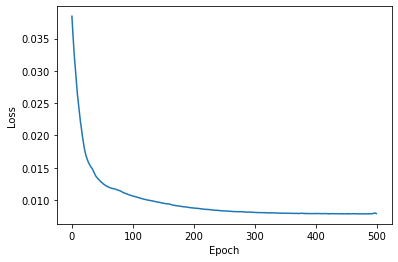

In [6]:
#Vemos el proceso de entrenamiento
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.plot(history.history['loss'])
plt.show()

In [7]:
score, mse = model.evaluate(X, y)
print('Score:', score)
#el error está normalizado, volvemos a los valores originales
error = np.square(mse)*(y_max - y_min) + y_min
print('Error:', np.round(error,2), 'euros')

1/1 [==============================] - 0s 72ms/step - loss: 0.0079 - mse: 0.0079
Score: 0.007894451729953289
Error: 45006.67 euros


In [8]:
#Predecimos cuánto vale un piso de 70 metros cuadrados
X_new = [ [70] ]
#hay que normalizar los datos

X_new = (X_new-X_min)/(X_max - X_min)

y_pred = model.predict(X_new)

#y desnormalizar los datos
y_pred = y_pred*(y_max - y_min) + y_min
print(np.round(y_pred[0][0],2), "euros")


72409.66 euros
